In [194]:
from sklearn import tree
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score
import numpy as np


### 1) Write a script to extract a random sample of 1000 rows from goldstandard dataset and save it to a file (i.e. gold_sample.csv)

In [188]:
gold_df= pd.read_csv('assignment2_data/gold.csv')
print(gold_df.index.size)
sample = gold_df.sample(1000)
sample.to_csv('assignment2_data/gold_sample.csv',index=False)
print(sample.index.size)

4999
1000


In [580]:
sample= pd.read_csv('../../../../Code/Assignment2/data/gold_sample.csv')


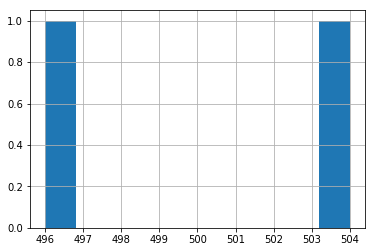

In [581]:
sample.id.groupby(sample['class']).nunique().hist();


([array([504.,   0.,   0.,   0.]), array([  0.,   0.,   0., 496.])],
 array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
 <a list of 2 Lists of Patches objects>)

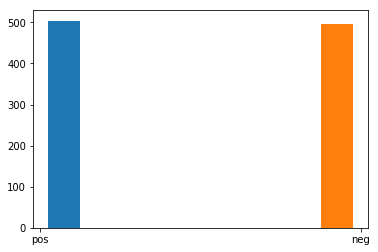

In [583]:
import matplotlib.pyplot as plt
labels = sample['class'].unique()
plt.hist([sample.loc[sample['class'] == x, 'class'] for x in labels], label=labels,bins=4)

In [582]:
sample['class'].describe()

count     1000
unique       2
top        pos
freq       504
Name: class, dtype: object

### 2) Write a script to build a classification model using Decision Treesthat take as input the file produced in task 1 (i.e. gold_sample.csv).The script should train a model, test its performance using testdataset (i.e. test.csv) and save the resulting model F-score, accuracy and prediction probabilities in a text file (i.e. train_gold.txt)

In [190]:
X = sample.iloc[:,:-1]
Y = sample['class']

In [191]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [192]:
test = pd.read_csv('assignment2_data/test.csv')
testX = test.iloc[:,:-1]
testY = test['class']
test.index.size

5428

In [200]:
test_predict = clf.predict(testX)
matrix = confusion_matrix(testY, test_predict)
reprot = classification_report(testY, test_predict)
# Compute accuracy 
acc = accuracy_score(testY, test_predict)
print("accuracy ",acc)
predict_proba = clf.predict_proba(testX)
print(predict_proba)
with open('assignment2_data/train_gold.txt', 'w') as f:
    f.write("Confusion Matrix\n")
    f.write("%s\n" % matrix)
    f.write("Accuracy\n")
    f.write("%s\n" % acc)
    f.write("classification_report\n")
    f.write("%s\n" % reprot)
    f.write("prediction probabilities\n")
    for item in predict_proba:
        f.write("%s\n" % item)
    

accuracy  0.9994473102431835
[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


## Part 2 - model training using crowdsourced data with majority voting

### 4)Extract rows from crowdsourced dataset that correspond to the sentence ids of step 1 and save it to file (i.e. mturk_sample.csv)

In [393]:
mturk= pd.read_csv('assignment2_data/mturk.csv')
mturk.head()

,id,annotator,TOPIC0,TOPIC1,TOPIC2,TOPIC3,TOPIC4,TOPIC5,TOPIC6,TOPIC7,...,TOPIC1191,TOPIC1192,TOPIC1193,TOPIC1194,TOPIC1195,TOPIC1196,TOPIC1197,TOPIC1198,TOPIC1199,class
0,4518,A2HD5XMM48KKJW,0.047554,-0.000308,0.023648,0.084735,0.000874,0.063103,-0.005063,-0.009235,...,-0.000948,0.001994,-0.020170,-0.005735,0.002075,-0.008209,0.009179,-0.000570,0.005638,pos
1,10415,A2HD5XMM48KKJW,0.057894,-0.002123,0.041045,0.059079,0.003419,0.026197,0.008809,-0.001602,...,0.015433,0.001089,-0.024572,0.094193,-0.088402,0.015108,0.007066,-0.042577,-0.058843,neg
2,7098,A2HD5XMM48KKJW,0.226327,0.041921,0.124921,0.291891,-0.030388,0.082626,-0.037958,-0.291264,...,0.000163,0.047404,-0.025245,-0.004108,0.027324,-0.038161,-0.021096,-0.018557,0.053247,pos
3,4396,A2HD5XMM48KKJW,0.011175,-0.001934,0.005822,0.014736,-0.001519,0.000643,0.010770,-0.004277,...,0.025773,0.011295,0.048014,-0.022640,-0.048314,0.035679,0.012249,-0.026116,-0.004993,neg
4,2812,A2HD5XMM48KKJW,0.023912,0.002982,0.008951,0.038452,0.015734,0.018588,0.004741,0.005001,...,0.057021,0.079538,-0.105252,0.011196,-0.060068,-0.029165,0.006014,-0.042851,-0.002392,pos


In [394]:
sample_ids = list(sample.id.unique())

In [584]:
#mturk_sample= pd.read_csv('../../../../Code/Assignment2/data/mturk_sample.csv')

mturk_sample = mturk[mturk.id.isin(sample_ids)]

([array([2530.,    0.,    0.,    0.]), array([   0.,    0.,    0., 3007.])],
 array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
 <a list of 2 Lists of Patches objects>)

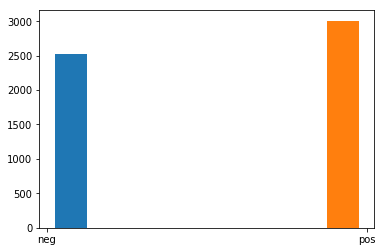

In [586]:
labels = mturk_sample['class'].unique()
plt.hist([mturk_sample.loc[mturk_sample['class'] == x, 'class'] for x in labels], label=labels,bins=4)

In [587]:
mturk_sample['class'].describe()

count     5537
unique       2
top        pos
freq      3007
Name: class, dtype: object

In [588]:
len(mturk_sample['annotator'].unique())

183

In [589]:
mturk_sample[mturk_sample['annotator'].str.startswith('FAKE')].index.size

547

In [206]:
mturk_sample.to_csv('assignment2_data/mturk_sample.csv',index=False)

### 5) Write a script to build a classification model using Decision Trees 
that take as input the file produced in task 4 (i.e. mturk_sample.csv). 
Aggregate the labels provided by workers using majority vote that assigns 
a point mass to the label with the highest consensus among a set of judgments. 
The script should aggregate labels, train a model, 
test its performance using test dataset (i.e. test.csv) 
and save the resulting model F-score, accuracy 
and prediction probabilities in a text file (i.e. train_mv.txt).


In [438]:
majority_df = pd.DataFrame()
for i in sample_ids:
    
    rows= mturk_sample[mturk_sample.id==i]
    votes = Counter(rows['class']) 
    
    temp= pd.DataFrame(rows[:1]) ## save to get features
    
    temp['class'] =votes['pos'] >= votes['neg'] ## change class based on majority vote, if equal then pos
    majority_df= majority_df.append(temp)
    #majority_vote.append((i,temp))
    
majority_df.drop(columns="annotator",inplace=True)
majority_df['class']=majority_df['class'].apply(lambda x:"pos" if x==1 else "neg")

In [439]:
majority_df.head()

,id,TOPIC0,TOPIC1,TOPIC2,TOPIC3,TOPIC4,TOPIC5,TOPIC6,TOPIC7,TOPIC8,...,TOPIC1191,TOPIC1192,TOPIC1193,TOPIC1194,TOPIC1195,TOPIC1196,TOPIC1197,TOPIC1198,TOPIC1199,class
4489,4248,0.077237,-0.004509,0.039199,0.094364,0.034297,0.000693,0.010868,0.011812,0.000873,...,-0.003096,-0.012004,-0.035492,-0.047814,-0.010331,0.034381,-0.049876,-0.022462,-0.021730,pos
4366,1511,0.003763,0.000654,0.003322,0.003972,0.004378,-0.001532,-0.001132,-0.001117,0.002971,...,-0.022894,-0.009897,-0.023079,0.013697,0.044367,-0.005238,0.009037,0.031081,-0.022616,pos
23761,4541,0.594009,0.133634,1.183057,0.734439,1.108055,0.568344,0.449185,0.966594,-0.727166,...,0.001425,-0.104534,0.051668,-0.075479,-0.034714,-0.022384,-0.028882,-0.015848,0.042537,pos
18903,10037,0.053498,0.010492,0.025447,0.072469,-0.058827,0.001985,0.057568,-0.035646,0.017089,...,0.028910,-0.010297,-0.031777,0.019292,0.003302,-0.022367,-0.033018,-0.007436,-0.068394,neg
21389,2371,0.027159,-0.002618,0.009418,0.041337,-0.007130,0.021808,-0.006475,-0.006858,-0.009456,...,-0.015788,-0.007888,0.031064,-0.005736,0.008113,0.037296,0.043695,0.063913,-0.018704,pos


In [553]:
X = majority_df.iloc[:,:-1]
Y = majority_df['class']
clf2 = tree.DecisionTreeClassifier()
clf2 = clf2.fit(X, Y)
test = pd.read_csv('assignment2_data/test.csv')
testX = test.iloc[:,:-1]
testY = test['class']

# test
test_predict = clf2.predict(testX)


#test classifier2 using test data
test_predict = clf.predict(testX)
#confusion matrix
confusion = confusion_matrix(testY, test_predict)
#predictions
report = classification_report(testY, test_predict) 
# Compute accuracy 
acc = accuracy_score(testY, test_predict)
#prediction probability
predict_proba = clf.predict_proba(testX)

acc

0.881171702284451

In [ ]:

#saving to file
with open('assignment2_data/train_mv.txt', 'w') as f:
    f.write("Confusion Matrix\n")
    f.write("%s\n" % confusion)
    f.write("Accuracy\n")
    f.write("%s\n" % acc)
    f.write("classification_report\n")
    f.write("%s\n" % reprot)
    f.write("prediction probabilities\n")
    for item in predict_proba:
        f.write("%s\n" % item)

## Part 3 - model training using crowdsourced data with David & Skene method

## Write a script to build a classification model using Decision Trees 
that take as input the file produced in task 4 (i.e. mturk_sample.csv). 
Aggregate the labels provided by workers using David & Skene method that uses maximum likelihood estimation approach. 
The script should aggregate labels, train a model, test its performance using test dataset (i.e. test.csv) 
and save the resulting model F-score, accuracy and prediction probabilities in a text file (i.e. train_ds.txt).

In [210]:
mturk_sample = pd.read_csv('assignment2_data/mturk_sample.csv')

In [211]:
workers_ids = set(mturk_sample.annotator.unique())

In [447]:
## initalize estimated polarity using majority votes
polarity = pd.DataFrame(columns=["id","pos","neg","class"])
polarity['id']= mturk_sample.id.unique()
polarity['pos'] = 0
polarity['neg'] = 0


In [504]:
polarity.head()

,id,pos,neg,class
0,5133,6,0,1
1,4491,6,0,1
2,2696,5,1,1
3,561,5,0,1
4,8155,0,5,0


In [448]:
from collections import Counter

## calculate majority vote
for i in sample_ids:
    
    rows= mturk_sample[mturk_sample.id==i]
    
    votes = Counter(rows['class']) 
    polarity.loc[polarity['id']==i,'pos']=votes['pos']
    polarity.loc[polarity['id']==i,'neg']=votes['neg']
    
polarity['class'] =polarity['pos'] >= polarity['neg'] # True if max==pos or pos==neg else False 
#if pos==neg then it is positive 1


In [449]:
polarity['class']=polarity['class'].astype('int') # True = 1 , False = 0 

In [450]:
polarity.head()

,id,pos,neg,class
0,5133,6,0,1
1,4491,6,0,1
2,2696,5,1,1
3,561,5,0,1
4,8155,0,5,0


In [451]:
workersdf= pd.DataFrame(columns=["annotator","pos_pos","neg_neg","pos_neg","neg_pos"])
workersdf['annotator'] = list(workers_ids)
workersdf.fillna(0.0,inplace=True)


In [505]:
workersdf.head()

,annotator,pos_pos,neg_neg,pos_neg,neg_pos,postotal,negtotal
0,A2JUTTLDE5LGHH,1.0,1.000000,0.0,0.000000,3.0,1.0
1,A2LCFORIW0NF1S,1.0,1.000000,0.0,0.000000,1.0,1.0
2,A3RP23KJ7MEI1J,1.0,0.833333,0.0,0.166667,1.0,6.0
3,A21YLMNQ9EHYS2,0.0,0.000000,0.0,1.000000,0.0,1.0
4,A1KH62H92N4L13,1.0,0.000000,0.0,0.000000,1.0,0.0


In [453]:
mturk_sample['classint']= mturk_sample['class'].apply(lambda x:0 if x=="neg" else 1)

/Users/suaddarra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [454]:
for n,row in mturk_sample.iterrows():
    worker = row['annotator']
    label = row['classint']
    majority = int(polarity[polarity.id==row.id]['class'])
    if (majority == label):
        # update worker array
        if(label ==1):
            workersdf.loc[workersdf.annotator==worker,'pos_pos']+=1
        else:
            workersdf.loc[workersdf.annotator==worker,'neg_neg']+=1
    else:
        if(label==1):
            workersdf.loc[workersdf.annotator==worker,'pos_neg']+=1
        else:
            workersdf.loc[workersdf.annotator==worker,'neg_pos']+=1
            

In [455]:
workersdf.head()

,annotator,pos_pos,neg_neg,pos_neg,neg_pos
0,A2JUTTLDE5LGHH,3.0,1.0,0.0,0.0
1,A2LCFORIW0NF1S,1.0,1.0,0.0,0.0
2,A3RP23KJ7MEI1J,1.0,5.0,0.0,1.0
3,A21YLMNQ9EHYS2,0.0,0.0,0.0,1.0
4,A1KH62H92N4L13,1.0,0.0,0.0,0.0


In [456]:
#normalize
workersdf['postotal'] = workersdf['pos_pos'] + workersdf['pos_neg'] 
workersdf['negtotal'] = workersdf['neg_neg'] + workersdf['neg_pos'] 

In [457]:
workersdf['pos_pos'] = workersdf['pos_pos']/workersdf['postotal']
workersdf['neg_neg'] = workersdf['neg_neg']/workersdf['negtotal']
workersdf['pos_neg'] = workersdf['pos_neg']/workersdf['postotal'] 
workersdf['neg_pos'] = workersdf['neg_pos']/workersdf['negtotal'] 


In [458]:
workersdf.fillna(0.0,inplace=True)
workersdf.head()

,annotator,pos_pos,neg_neg,pos_neg,neg_pos,postotal,negtotal
0,A2JUTTLDE5LGHH,1.0,1.000000,0.0,0.000000,3.0,1.0
1,A2LCFORIW0NF1S,1.0,1.000000,0.0,0.000000,1.0,1.0
2,A3RP23KJ7MEI1J,1.0,0.833333,0.0,0.166667,1.0,6.0
3,A21YLMNQ9EHYS2,0.0,0.000000,0.0,1.000000,0.0,1.0
4,A1KH62H92N4L13,1.0,0.000000,0.0,0.000000,1.0,0.0


In [527]:
polarity2 = pd.DataFrame(polarity,copy=True)
workersdf2 = pd.DataFrame(workersdf,copy=True)
workersdf2 = workersdf2.round(2)
polarity2 = polarity2.round(2)

In [528]:
# repeat until convergence
loops=1
while True:
    
    ######## update polarity #######
    polarity_old = pd.DataFrame(polarity2,copy=True)
    
    # iterate sample ids
    for x,i in enumerate(sample_ids):
        #get samples info
        rows= mturk_sample[mturk_sample.id==i]
        pos = 0
        neg = 0
        #iterate samples
        for n,row in rows.iterrows():
            #get workers and their vote
            worker = row['annotator']
            classint = int(row['classint'])
            #print(worker,classint,i)
            temp = workersdf2[workersdf2.annotator==worker]
                
            if (classint==1):
                pos+=round(float(temp.pos_pos),2)
                neg+=round(float(temp.pos_neg),2)
            elif (classint==0):
                neg+=round(float(temp.neg_neg),2)
                pos+=round(float(temp.neg_pos),2)
            else:
                print('notZeroOrOne',classint)
        
        total=pos+neg #to normalize polarity
        v=0
        v2=0
        
        if(total>0):
            v = round(float(pos/total),2)
            v2 = round(float(neg/total),2)
        else:
            print(pos,neg,total)

        polarity2.loc[polarity2['id']==i,'pos']=v
        polarity2.loc[polarity2['id']==i,'neg']=v2
        polarity2.loc[polarity2['id']==i,'class']= 1 if pos>=neg else 0
        
    #check convergence
    if(polarity_old.equals(polarity2)):
        print('converge at loop',loops)
        break
    
    ######## update workers accuracy ########
    
    for n,row in mturk_sample.iterrows():
        worker = row['annotator']
        label = row['classint']
        majority = int(polarity2[polarity2.id==row.id]['class'])
        if (majority == label):
            # update worker array
            if(label ==1):
                #print('maj==label==1')
                workersdf2.loc[workersdf2.annotator==worker,'pos_pos']+= round(float(polarity2[polarity2.id==row.id]['pos']),2)
            else:
                #print('maj==label==0')

                workersdf2.loc[workersdf2.annotator==worker,'neg_neg']+= round(float(polarity2[polarity2.id==row.id]['neg']),2)
        else:
            if(label==1):
                #print('maj==0 label==1')

                workersdf2.loc[workersdf2.annotator==worker,'pos_neg']+= round(float(polarity2[polarity2.id==row.id]['neg']),2)
            else:
                #print('maj==1 label==0')

                workersdf2.loc[workersdf2.annotator==worker,'neg_pos']+= round(float(polarity2[polarity2.id==row.id]['pos']),2)

    #normalize
    workersdf2['postotal'] = workersdf2['pos_pos'] + workersdf2['pos_neg'] 
    workersdf2['negtotal'] = workersdf2['neg_neg'] + workersdf2['neg_pos'] 
    
    workersdf2['pos_pos'] = workersdf2['pos_pos'] / workersdf2['postotal']
    workersdf2['neg_neg'] = workersdf2['neg_neg'] / workersdf2['negtotal']
    workersdf2['pos_neg'] = workersdf2['pos_neg'] / workersdf2['postotal'] 
    workersdf2['neg_pos'] = workersdf2['neg_pos'] / workersdf2['negtotal'] 
    workersdf2.fillna(0.0,inplace=True)
    workersdf2 = workersdf2.round(2)
    loops+=1
    print(polarity2[polarity2.id==8155])
    print(workersdf2[workersdf2.annotator=='A2J4TPLU00ZRYJ'])
    if(loops==30):
        break


     id  pos  neg  class
4  8155  0.1  0.9      0
         annotator  pos_pos  neg_neg  pos_neg  neg_pos  postotal  negtotal
21  A2J4TPLU00ZRYJ      1.0      1.0      0.0      0.0      5.25      7.77
     id   pos   neg  class
4  8155  0.08  0.92      0
         annotator  pos_pos  neg_neg  pos_neg  neg_pos  postotal  negtotal
21  A2J4TPLU00ZRYJ      1.0      1.0      0.0      0.0      5.38      7.87
     id   pos   neg  class
4  8155  0.08  0.92      0
         annotator  pos_pos  neg_neg  pos_neg  neg_pos  postotal  negtotal
21  A2J4TPLU00ZRYJ      1.0      1.0      0.0      0.0      5.38      7.87
     id   pos   neg  class
4  8155  0.08  0.92      0
         annotator  pos_pos  neg_neg  pos_neg  neg_pos  postotal  negtotal
21  A2J4TPLU00ZRYJ      1.0      1.0      0.0      0.0      5.37      7.88
     id   pos   neg  class
4  8155  0.08  0.92      0
         annotator  pos_pos  neg_neg  pos_neg  neg_pos  postotal  negtotal
21  A2J4TPLU00ZRYJ      1.0      1.0      0.0      0.0     

In [145]:
polarity2.index.size

1000

In [529]:
polarity.tail()

,id,pos,neg,class
995,3978,3,2,1
996,10410,2,3,0
997,4501,1,4,0
998,8843,0,5,0
999,7724,0,5,0


In [530]:
polarity2.tail()

,id,pos,neg,class
995,3978,0.57,0.43,1
996,10410,0.37,0.63,0
997,4501,0.21,0.79,0
998,8843,0.10,0.90,0
999,7724,0.18,0.82,0


## check results

In [531]:
compare = pd.merge(polarity,polarity2,on="id")
diff = compare[compare.class_x!=compare.class_y]

In [532]:
diff.index.size

29

new results seem to flip when workers vote is a tie or close to

In [533]:
polarity2.head()

,id,pos,neg,class
0,5133,0.88,0.12,1
1,4491,0.90,0.10,1
2,2696,0.88,0.11,1
3,561,0.91,0.09,1
4,8155,0.08,0.92,0


In [534]:
sample = pd.read_csv('assignment2_data/gold_sample.csv')
sample.head()

,id,TOPIC0,TOPIC1,TOPIC2,TOPIC3,TOPIC4,TOPIC5,TOPIC6,TOPIC7,TOPIC8,...,TOPIC1191,TOPIC1192,TOPIC1193,TOPIC1194,TOPIC1195,TOPIC1196,TOPIC1197,TOPIC1198,TOPIC1199,class
0,4248,0.077237,-0.004509,0.039199,0.094364,0.034297,0.000693,0.010868,0.011812,0.000873,...,-0.003096,-0.012004,-0.035492,-0.047814,-0.010331,0.034381,-0.049876,-0.022462,-0.021730,pos
1,1511,0.003763,0.000654,0.003322,0.003972,0.004378,-0.001532,-0.001132,-0.001117,0.002971,...,-0.022894,-0.009897,-0.023079,0.013697,0.044367,-0.005238,0.009037,0.031081,-0.022616,pos
2,4541,0.594009,0.133634,1.183057,0.734439,1.108055,0.568344,0.449185,0.966594,-0.727166,...,0.001425,-0.104534,0.051668,-0.075479,-0.034714,-0.022384,-0.028882,-0.015848,0.042537,pos
3,10037,0.053498,0.010492,0.025447,0.072469,-0.058827,0.001985,0.057568,-0.035646,0.017089,...,0.028910,-0.010297,-0.031777,0.019292,0.003302,-0.022367,-0.033018,-0.007436,-0.068394,neg
4,2371,0.027159,-0.002618,0.009418,0.041337,-0.007130,0.021808,-0.006475,-0.006858,-0.009456,...,-0.015788,-0.007888,0.031064,-0.005736,0.008113,0.037296,0.043695,0.063913,-0.018704,pos


In [570]:
sample = pd.read_csv('assignment2_data/gold_sample.csv')
final_df = pd.DataFrame()
polarity2['class_ds']= polarity2['class'].apply(lambda x:"neg" if x==0 else "pos")
final_df = pd.merge(sample,polarity2[["id","class_ds"]],on="id")
final_df.head()

,id,TOPIC0,TOPIC1,TOPIC2,TOPIC3,TOPIC4,TOPIC5,TOPIC6,TOPIC7,TOPIC8,...,TOPIC1192,TOPIC1193,TOPIC1194,TOPIC1195,TOPIC1196,TOPIC1197,TOPIC1198,TOPIC1199,class,class_ds
0,4248,0.077237,-0.004509,0.039199,0.094364,0.034297,0.000693,0.010868,0.011812,0.000873,...,-0.012004,-0.035492,-0.047814,-0.010331,0.034381,-0.049876,-0.022462,-0.021730,pos,pos
1,1511,0.003763,0.000654,0.003322,0.003972,0.004378,-0.001532,-0.001132,-0.001117,0.002971,...,-0.009897,-0.023079,0.013697,0.044367,-0.005238,0.009037,0.031081,-0.022616,pos,pos
2,4541,0.594009,0.133634,1.183057,0.734439,1.108055,0.568344,0.449185,0.966594,-0.727166,...,-0.104534,0.051668,-0.075479,-0.034714,-0.022384,-0.028882,-0.015848,0.042537,pos,pos
3,10037,0.053498,0.010492,0.025447,0.072469,-0.058827,0.001985,0.057568,-0.035646,0.017089,...,-0.010297,-0.031777,0.019292,0.003302,-0.022367,-0.033018,-0.007436,-0.068394,neg,neg
4,2371,0.027159,-0.002618,0.009418,0.041337,-0.007130,0.021808,-0.006475,-0.006858,-0.009456,...,-0.007888,0.031064,-0.005736,0.008113,0.037296,0.043695,0.063913,-0.018704,pos,pos


In [ ]:
final_df.drop(columns="class",inplace=True)


In [545]:
#prepare training data 
#all features expect last column of label
X = final_df.iloc[:,:-1]
#labels column
Y = final_df['class_ds']

# init tree classifier
clf = tree.DecisionTreeClassifier()
#train using sample data
clf = clf.fit(X, Y)

#read test data
test = pd.read_csv('assignment2_data/test.csv')
#prepare it like before
testX = test.iloc[:,:-1]
testY = test['class']

#test classifier using test data
test_predict = clf.predict(testX)
#confusion matrix
confusion = confusion_matrix(testY, test_predict)
#predictions
report = classification_report(testY, test_predict) 
# Compute accuracy 
acc = accuracy_score(testY, test_predict)
#prediction probability
predict_proba = clf.predict_proba(testX)
acc

0.881171702284451

In [538]:
#saving to file
with open('assignment2_data/train_ds.txt', 'w') as f:
    f.write("Confusion Matrix\n")
    f.write("%s\n" % confusion)
    f.write("Accuracy\n")
    f.write("%s\n" % acc)
    f.write("classification_report\n")
    f.write("%s\n" % reprot)
    f.write("prediction probabilities\n")
    for item in predict_proba:
        f.write("%s\n" % item)
